In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:
test_df = pd.read_csv("/home/preeti/Desktop/titanic/test.csv")
train_df = pd.read_csv("/home/preeti/Desktop/titanic/train.csv")

Data exploration

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Analysis

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_df.Survived.sum()

342

We can see that 342 out of 891 survived. i.e. 38% of the total passengers.

Now, AGE, Cabin and may be others too, have some missing values.
So, before we decide what to do with such attribute, lets count the sum and percentage of total missing values in each individual columns.

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
print (total)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


So, We have missing data in Age, Cabin and Embarked. 
lets calculate the percentage of each, with round off upto 1 decimal place, i.e. round(percentage, 1)

missingData = pd.concat([total,percentage2],axis =1, keys =['Total','Percentage'])
creating a dataframe of missing data

In [9]:
percentage = train_df.isnull().sum()/train_df.isnull().count()*100
percentage2 = round(percentage,1).sort_values(ascending=False)
total.head(3)

missingData = pd.concat([total,percentage2],axis =1, keys =['Total','Percentage'])
missingData.head(3)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


Now, we can easily drop Cabin, as it has 77% of missing data, thats not useful.
Embarked has only 2, which can be filled up easily.
However, Age needs some bit of engineering to be done with it.

In [10]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    


In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [12]:
age1 = min(train_df["Age"])
age2 = min(test_df["Age"])
age1,age2

(0.42, 0.17)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

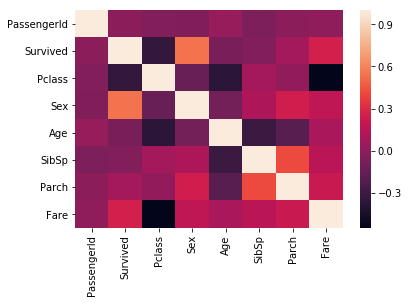

In [13]:
corr = train_df.corr()
sb.heatmap(corr)
print(corr)

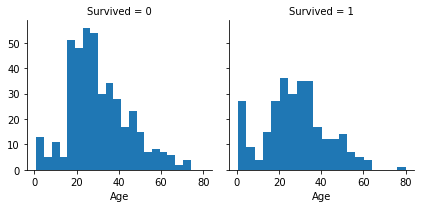

In [14]:
g = sb.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)



observations :

Infants (Age <=4) ------high survival rate.
Oldest passengers -------(Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.

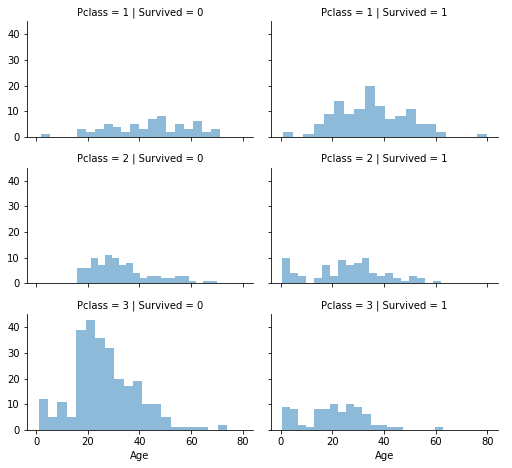

In [15]:
grid = sb.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();



Observations.

    Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
    Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
    Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
    Pclass varies in terms of Age distribution of passengers.


/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


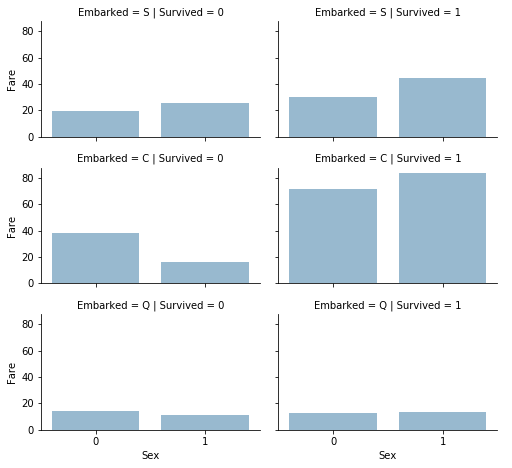

In [16]:
grid = sb.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sb.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Observations.

    Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
    Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).


In [17]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [19]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Data Cleaning


    Names are unique across the dataset (count=unique=891)
    Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
    Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
    Embarked takes three possible values. S port used by most passengers (top=S)
    Ticket feature has high ratio (22%) of duplicate values (unique=681).


In [21]:
train_df.describe(include=['O'])


,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Panula, Master. Juha Niilo",347082,B96 B98,S
freq,1,7,4,644


In [22]:
train_df=train_df.drop(['Cabin','Ticket'],axis=1)
test_df=test_df.drop(['Cabin','Ticket'],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [23]:
median = train_df["Age"].median()
train_df['Age']=train_df['Age'].fillna(median)
test_df['Age']=test_df['Age'].fillna(median)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [24]:
total = train_df.isnull().sum().sort_values(ascending=False)
print (total)

Embarked       2
Fare           0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64


In [25]:
total = test_df.isnull().sum().sort_values(ascending=False)
print (total)

Fare           1
Embarked       0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64


Binning 'Age'

In [26]:
age1 = min(train_df["Age"])
age2 = min(test_df["Age"])
age1,age2

(0.42, 0.17)

Here Age in Test_df is lesser than that in Train_df,so we will make BIns considerining this.

In [27]:

bins =np.linspace(min(test_df["Age"]),max(train_df["Age"]),6)

train_df["Age Binned"] = pd.cut(train_df["Age"],bins, labels=["1","2","3","4","5"] ,include_lowest=True)
test_df["Age Binned"] = pd.cut(test_df["Age"],bins, labels=["1","2","3","4","5"] ,include_lowest=True)
train_df =train_df.drop(['Age'],axis =1)
test_df =test_df.drop(['Age'],axis =1)
train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age Binned
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,S,3


In [28]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
freq_port = train_df.Embarked.dropna().mode()[0]

data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

    


In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age Binned
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,0,3


In [31]:
total = test_df.isnull().sum().sort_values(ascending=False)
print (total)

Fare           1
Age Binned     0
Embarked       0
Parch          0
SibSp          0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64


In test-dataset, we have 1 missing value, so we will fill it with a median.

In [32]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age Binned
0,892,3,"Kelly, Mr. James",0,0,0,7.8292,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,7.0000,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,9.6875,2,4
3,895,3,"Wirz, Mr. Albert",0,0,0,8.6625,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,12.2875,0,2


In [33]:
bins =np.linspace(min(train_df["Fare"]),max(train_df["Fare"]),4)

train_df["Fare Binned"] = pd.cut(train_df["Fare"],bins, labels=["1","2","3"] ,include_lowest=True)
test_df["Fare Binned"] = pd.cut(test_df["Fare"],bins, labels=["1","2","3"] ,include_lowest=True)
train_df =train_df.drop(['Fare'],axis =1)
test_df =test_df.drop(['Fare'],axis =1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Age Binned,Fare Binned
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,1,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,0,3,1
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,3,1


Now, lets see what we can extract from "Name".

In [34]:
combine =[train_df,test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [35]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [36]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
train_df.head()


,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Binned,Fare Binned,Title
0,0,3,0,1,0,0,2,1,1
1,1,1,1,1,0,1,3,1,3
2,1,3,1,0,0,0,2,1,2
3,1,1,1,1,0,0,3,1,3
4,0,3,0,0,0,0,3,1,1


In [37]:
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
test_df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age Binned,Fare Binned,Title
0,3,0,0,0,2,3,1,1
1,3,1,1,0,0,3,1,3
2,2,0,0,0,2,4,1,1
3,3,0,0,0,0,2,1,1
4,3,1,1,1,0,2,1,3


In [38]:
total = train_df.isnull().sum().sort_values(ascending=False)
print (total)

Title          0
Fare Binned    0
Age Binned     0
Embarked       0
Parch          0
SibSp          0
Sex            0
Pclass         0
Survived       0
dtype: int64


In [39]:
combine =[train_df,test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [41]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

train_df.head()

,Survived,Pclass,Sex,Embarked,Age Binned,Fare Binned,Title,IsAlone
0,0,3,0,0,2,1,1,0
1,1,1,1,1,3,1,3,0
2,1,3,1,0,2,1,2,1
3,1,1,1,0,3,1,3,0
4,0,3,0,0,3,1,1,1


# Model, Predict, Solve

Since, our problem is based on classification and Regression(to predict Survival) with Supervised learning, so, we will be using the following algos :


    Logistic Regression
    KNN or k-Nearest Neighbors
    Support Vector Machines
    Naive Bayes classifier
    Decision Tree
    Random Forrest
    Perceptron
    Artificial neural network
    RVM or Relevance Vector Machine


In [42]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

Logistic Regression

There are three types of scores:
Training score - checks the training accuracy of the model created.(X_train, Y_train)
Test score - checks the testing accuracy of the model based on test dataset only.(X_test, Y_test)
Model score - checks the accuracy of model.(Y_test,Y_pred)

In [43]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
train_acc_LR =round(LR.score(X_train,Y_train)* 100, 7)


train_acc_LR

/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.5836139

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

LR.coef_[0] computes the correlation coeff. for features[1]. 
Suppose , you have two columns, feature-1 and feature2, so LR.coef_[0] computes coeff for feature1 andLR.coef_[1] for feature2.

Next is SVC, Supervised Vector Machine.

In [47]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.6

KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.83

Gaussian Naive Bayes

In [49]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.34

Perceptron

In [50]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


72.73

Linear SVC

In [51]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

Stochastic Gradient Descent

In [52]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


79.12

Decision Tree

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.4

Random Forest Score

In [54]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


84.4

Creating a table to compare the scores of all the algos :

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, train_acc_LR, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.400000
8,Decision Tree,84.400000
1,KNN,82.830000
0,Support Vector Machines,82.600000
2,Logistic Regression,80.583614
7,Linear SVC,79.460000
6,Stochastic Gradient Decent,79.120000
4,Naive Bayes,78.340000
5,Perceptron,72.730000
